In [ ]:
# DSC 540
# Weeks 9 & 10 
# Summer 2024
# Term Project Milestone 5
# Created By Matthew Heinen
# 8/7/24

# Weather and Carlos Santana’s Effectiveness
## DSC 540: Milestone 5

# Load Datasets into SQL Database

Here we will take all 3 tables that we have created in previous milestones, flat file, web scraped and API data, and write or load them into a database. As a reminder the 3 tables are as follows: 

Flat File: Baseball Savant data from all balls put in play across Carlos Santana's 17 year MLB career. 
Web Scraped: Data from Steamheads about MLB ballpark latitude, longitude and altitude. 
API: Historical weather data recorded from the location and time of the games Santana played in. 


In [33]:
# Import Packages. 
import pandas as pd
import sqlite3

# Read the CSV file into a DataFrame
bip = pd.read_csv('carlos_balls_in_play.csv')
weather = pd.read_csv('carlos_weather_from_api_no_duplicates.csv')
ballparks = pd.read_csv('ballpark_data_web.csv')
ab_key = pd.read_csv('ab_key.csv')


# Connect to the SQLite database named carlos.db
conn = sqlite3.connect('carlos.db')

# Write the DataFrame to a SQL database
bip.to_sql('carlos_balls_in_play', conn, if_exists='replace', index=False)
weather.to_sql('weather', conn, if_exists='replace', index=False)
ballparks.to_sql('ballparks', conn, if_exists='replace', index=False)
ab_key.to_sql('ab_key', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

In [10]:
# Establish connection 
# We have to re establish connection after the connection was closed above. 
conn = sqlite3.connect("carlos.db")  

# Define the cursor as c, This will be used to execute SQL commands and queries. 
c = conn.cursor()

In [16]:
# write SQL statemtnt to query the count of people from the persons table 
# grouped by age

query = "SELECT * FROM carlos_balls_in_play"

# Execute 
c.execute(query)
#use fetchall to loop through and print every row returned from the query. 
for row in c.fetchall():
    print(row)

# Close the connection 
conn.close()

('SI', '2018-06-19', 101.2, -1.43, 6.18, 'Hicks, Jordan', 663855, 'field_out', 1, 'Carlos Santana grounds out, shortstop Yairo Munoz to first baseman Matt Carpenter.', 'R', 'L', 'R', 'PHI', 'STL', 6.0, 'ground_ball', 0, 0, -1.24, 0.57, -0.54, 3.3, 0, 0, 0, 0, 9, 'Bot', 7.0, 97.5, -25.0, 101.4, 1933.0, 6.3, 530501, 54.19, 0.153, 0.132, 0, 0, 2.0, 79, 1, 'Sinker', 6, 7, 6, 7, 7, 6, 6, 7, 'Standard', 'Standard', 245.0, -0.086, -0.232, 1529452800)
('FF', '2015-05-24', 100.9, 0.84, 6.34, 'Chapman, Aroldis', 547973, 'single', 7, 'Carlos Santana singles on a ground ball to center fielder Brennan Boesch.   Jason Kipnis scores.', 'R', 'R', 'L', 'CLE', 'CIN', 8.0, 'ground_ball', 1, 0, 1.0, 1.54, -0.3, 1.95, 0, 1, 0, 1, 8, 'Bot', 22.0, 101.5, -5.0, 101.1, 2488.0, 6.6, 414302, 54.5, 0.347, 0.296, 1, 0, 2.0, 68, 2, '4-Seam Fastball', 4, 1, 4, 1, 1, 5, 5, 1, 'Standard', 'Standard', None, 0.012, 0.578, 1432512000)
('SI', '2019-05-26', 100.5, 0.86, 6.66, 'Alvarado, José', 621237, 'force_out', 9, 'Carl

In [27]:
import pandas as pd
from sqlalchemy import create_engine

# Create a connection to the SQLite database
engine = create_engine('sqlite:///carlos.db')

# Read the table from the SQLite database into a pandas DataFrames to view them. 
weather = pd.read_sql_table('weather', con=engine)
bip = pd.read_sql_table('carlos_balls_in_play', con=engine)

In [29]:
weather.head()
bip.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,pitcher_id,ab_result,pitch_zone_location,description,...,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,unix_time
0,SI,2018-06-19,101.2,-1.43,6.18,"Hicks, Jordan",663855,field_out,1,"Carlos Santana grounds out, shortstop Yairo Mu...",...,7,6,6,7,Standard,Standard,245.0,-0.086,-0.232,1529452800
1,FF,2015-05-24,100.9,0.84,6.34,"Chapman, Aroldis",547973,single,7,Carlos Santana singles on a ground ball to cen...,...,1,5,5,1,Standard,Standard,NaN,0.012,0.578,1432512000
2,SI,2019-05-26,100.5,0.86,6.66,"Alvarado, José",621237,force_out,9,"Carlos Santana grounds into a force out, field...",...,6,3,3,6,Standard,Standard,143.0,-0.040,-0.459,1558915200
3,FF,2023-06-03,100.2,-1.47,6.24,"Hicks, Jordan",663855,single,2,Carlos Santana singles on a fly ball to left f...,...,1,4,4,1,Strategic,Standard,210.0,0.064,0.748,1685836800
4,FF,2019-09-14,100.1,-1.55,6.44,"Graterol, Brusdar",660813,field_out,12,"Carlos Santana grounds out, shortstop Jorge Po...",...,4,5,5,4,Infield shift,Standard,205.0,-0.018,-0.286,1568505600


# Join Tables From Database Into 1 Dataframe

Here we will join all of the tables in our database into one DataFrame to perform our analysis. 

In [41]:
# Write SQL query to join all tables into one for the purpose of making one large data set. 
# Join bip to ab_key (on abbreviation) 
# Join ab_key to ballparks (on lat and lon)
# Join ballparks to weather (on lat, lon and unix time (from bip))
# All should be inner joins. 

query = ''' 
SELECT *
FROM carlos_balls_in_play
INNER JOIN ab_key ON carlos_balls_in_play.home_team = ab_key.abreviation
INNER JOIN ballparks ON ab_key.team_name = ballparks.Team
INNER JOIN weather ON ballparks.lat = weather.lat AND ballparks.long = weather.lon AND carlos_balls_in_play.unix_time = weather.datetime;
'''

In [55]:
# Import packages. 
import sqlite3
import pandas as pd

# Establish connection 
# We have to re establish connection after the connection was closed above. 
conn = sqlite3.connect("carlos.db")  

# Read the results of the SQL query into carlos_data DataFrame. 
carlos_data = pd.read_sql_query(query , conn)

# Close the connection
conn.close()

In [63]:
# Verify that the DataFrame has read in properly. 
carlos_data.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,pitcher_id,ab_result,pitch_zone_location,description,...,temp,feels_like,pressure_hPa,humidity,dew_point,cloud_cover,wind_deg,weather_type,description,pressure_atm
0,SI,2018-06-19,101.2,-1.43,6.18,"Hicks, Jordan",663855,field_out,1,"Carlos Santana grounds out, shortstop Yairo Mu...",...,82.562,81.698,1009,38,54.410,40,10,Clouds,scattered clouds,0.995806
1,FF,2015-05-24,100.9,0.84,6.34,"Chapman, Aroldis",547973,single,7,Carlos Santana singles on a ground ball to cen...,...,77.810,76.658,1021,29,43.052,100,130,Clouds,overcast clouds,1.007649
2,SI,2019-05-26,100.5,0.86,6.66,"Alvarado, José",621237,force_out,9,"Carlos Santana grounds into a force out, field...",...,60.458,60.476,1017,91,57.812,100,20,Mist,mist,1.003701
3,FF,2023-06-03,100.2,-1.47,6.24,"Hicks, Jordan",663855,single,2,Carlos Santana singles on a fly ball to left f...,...,79.070,79.070,1013,73,69.674,75,80,Clouds,broken clouds,0.999753
4,FF,2019-09-14,100.1,-1.55,6.44,"Graterol, Brusdar",660813,field_out,12,"Carlos Santana grounds out, shortstop Jorge Po...",...,69.404,69.296,1022,69,58.802,0,270,Clear,clear sky,1.008636


In [67]:
# Verify the shape of the DataFrame. 
carlos_data.shape


(1942, 82)

In [71]:
# Print all the column names in carlos_data. 
# This will both help us verify and refresh our memory of whats in the DataFrame. 
print(carlos_data.columns)

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'pitcher_name', 'pitcher_id', 'ab_result',
       'pitch_zone_location', 'description', 'game_type', 'batter_stance',
       'p_throws', 'home_team', 'away_team', 'hit_location', 'bb_type',
       'balls', 'strikes', 'pitch_hor_break', 'pitch_ver_break', 'plate_x',
       'plate_z', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning',
       'inning_topbot', 'hit_distance_sc', 'launch_speed', 'launch_angle',
       'effective_speed', 'release_spin_rate', 'release_extension', 'game_id',
       'release_pos_y', 'estimated_ba_using_speedangle',
       'estimated_woba_using_speedangle', 'babip_value', 'iso_value',
       'contact_type', 'at_bat_number', 'pitch_number', 'pitch_name',
       'home_score', 'away_score', 'bat_score', 'fld_score', 'post_away_score',
       'post_home_score', 'post_bat_score', 'post_fld_score',
       'if_fielding_alignment', 'of_fielding_alignment', 'spin_axis',
       '

Here we can see that all of our data appears to have read in properly and completely. We can now begin our analysis. 

# Create 5 Visualizations That Demonstrate the Data. 

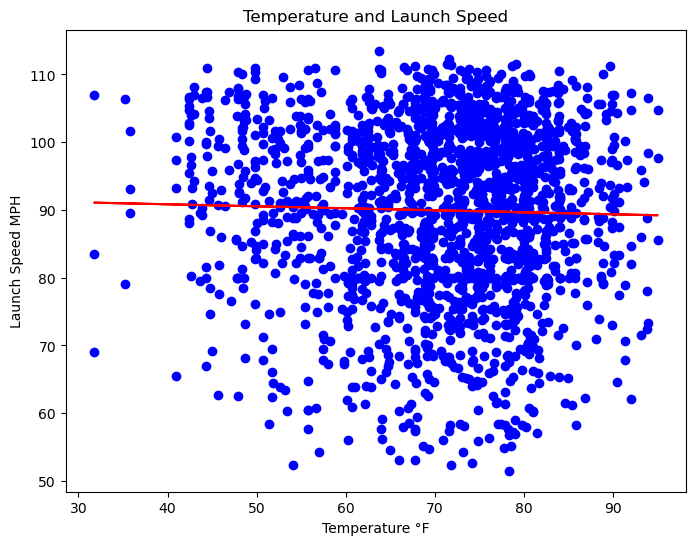

In [75]:
# Build Scatter plot showing the relationship between temperature and launch speed. 

# Impost necessary packages. 
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(carlos_data['temp'], carlos_data['launch_speed'], color='b', marker='o')

# Use numpy to add a trendline
# Define coefficients
coefficients = np.polyfit(carlos_data['temp'], carlos_data['launch_speed'], 1)
# Define Trendline
trendline = np.poly1d(coefficients)
# plot Trendline
plt.plot(carlos_data['temp'], trendline(carlos_data['temp']), color='r', label='Trendline')
# Add labels and title
plt.title('Temperature and Launch Speed')
plt.xlabel('Temperature °F')
plt.ylabel('Launch Speed MPH')

# Display the plot
plt.show()